# 8章 数値シミュレーションで消費者行動を予測する10本ノック

ここでは、消費者行動が口コミなどの情報伝播によってどのように変化していくかを分析する、
人間関係のネットワーク構造を用いた数値シミュレーション手法を中心に学んでいきます。

SNS のつながりで今後の売れ行きを予測する。

### Data
File 名 | 概要 | 詳細
--- | --- | ---
links.csv | Repeater 20人の SNS でのつながり | つながりのある組み合わせには１、ない組み合わせには０が記載されている。
links_member.csv | Repeater 540人の SNS でのつながり | つながりのある組み合わせには１、ない組み合わせには０が記載されている。
info_members.csv | Repeater 540人の 月々の利用状況 | ２年間のうちの月々の利用状況が記載されている。

消費者の口コミによる行動分析を行う。
まず、Network 構造を記述している links.csv を読み込み Library NetworkX を用いて可視化する。

In [1]:
import pandas as pd

df_links = pd.read_csv('sample_code/chapter_8/links.csv')
df_links

,Unnamed: 0,Node0,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,...,Node10,Node11,Node12,Node13,Node14,Node15,Node16,Node17,Node18,Node19
0,Node0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Node2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Node3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Node4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,Node5,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,Node6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,Node7,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,Node8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
9,Node9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


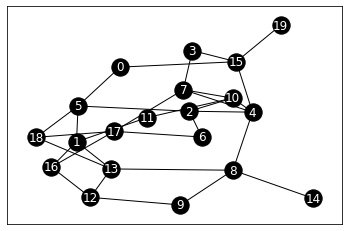

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Class object の作成
G = nx.Graph()

# 頂点の設定
NUM = len(df_links.index)
for i in range(1, NUM + 1):
    node_no = df_links.columns[i].strip('Node')
    # print(node_no)
    G.add_node(str(node_no))

# 辺の設定
for i in range(NUM):
    for j in range(NUM):
        # print(i, j)
        node_name = f'Node{j}'
        if df_links[node_name].iloc[i] == 1:
            G.add_edge(str(i), str(j))

# 描画
nx.draw_networkx(G, node_color='k', edge_color='k', font_color='w')
plt.show()

口コミが伝播していく様子を Simulation してみる。
### 仮定
10のつながりのうち、１つの確率（10%の確率）で口コミが伝播してく

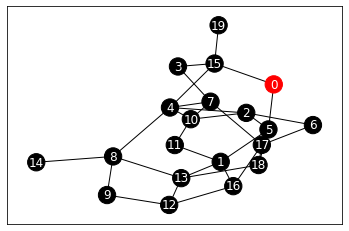

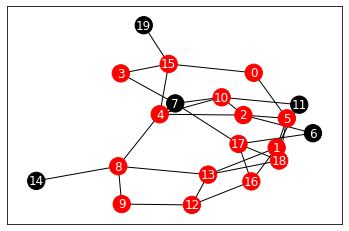

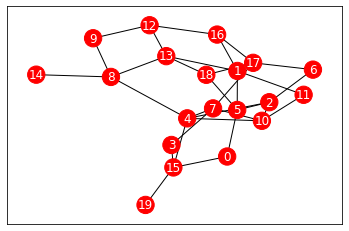

In [3]:
import numpy as np


def determine_link(percent):
    rand_val = np.random.rand()
    if rand_val <= percent:
        return 1
    else:
        return 0


def simulate_percolation(num, list_active, percent_percolation):
    for i in range(num):
        if list_active[i] == 1:
            for j in range(num):
                node_name = f'Node{str(j)}'
                if df_links[node_name].iloc[i] == 1:
                    if determine_link(percent_percolation) == 1:
                        list_active[j] = 1
    return list_active


percent_percolation = 0.1
T_NUM = 100
NUM = len(df_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1
list_timeSeries = []
for t in range(T_NUM):
    list_active = simulate_percolation(NUM, list_active, percent_percolation)
    list_timeSeries.append(list_active.copy())


def active_node_coloring(list_active):
    # print(list_timeSeries[t])
    list_color = []
    for i in range(len(list_timeSeries[t])):
        if list_timeSeries[t][i] == 1:
            list_color.append('r')
        else:
            list_color.append('k')
    # print(len(list_color))
    return list_color


t = 0
nx.draw_networkx(G, font_color='w', node_color=active_node_coloring(list_timeSeries[t]))
plt.show()

t = 10
nx.draw_networkx(G, font_color='w', node_color=active_node_coloring(list_timeSeries[t]))
plt.show()

t = 99
nx.draw_networkx(G, font_color='w', node_color=active_node_coloring(list_timeSeries[t]))
plt.show()

active_coloring は、口コミが伝播した（活性化した）Node を赤色で、未だ伝播していない（活性化していない）Node を黒色で色付けする関数。
10ヶ月程度だと緩やかな伝播だったものが、長い時間が経過すると全員に伝播する、といった様子がわかる。

---
口コミの伝播が行なわれる全体像をある程度、つかむ為に口コミされた数を時系列で表現表示してみる。

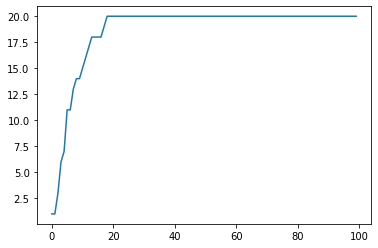

In [4]:
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))

plt.plot(list_timeSeries_num)
plt.show()

段階的に口コミが起こっている様子を確認。徐々に伝播してやがては全員に伝播している。

---

口コミによって、Sport gym の利用状況がどのように変化してくか Simulation してく。
### 目的
分析と併せて Simulation することで将来予測する。

In [5]:
def simulate_population(num, list_active, percent_percolation, percent_disappearance, df_links):
    # 拡散
    for i in range(num):
        if list_active[i] == 1:
            for j in range(num):
                if df_links.iloc[i][j] == 1:
                    if determine_link(percent_percolation) == 1:
                        list_active[j] = 1
    # 消滅
    for i in range(num):
        if determine_link(percent_disappearance) == 1:
            list_active[i] = 0

    return list_active

In [6]:
percent_percolation = 0.1
percent_disappearance = 0.05
T_NUM = 100
NUM = len(df_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1

list_timeSeries = []

for i in range(T_NUM):
    list_active = simulate_population(NUM, list_active, percent_percolation, percent_disappearance, df_links)
    list_timeSeries.append(list_active.copy())

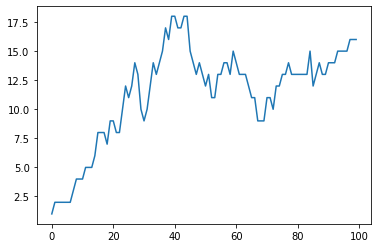

In [7]:
# 時系列 Graph を描く
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))

plt.plot(list_timeSeries_num)
plt.show()

Sport gym の会員が退会をする確率を５%で起こるものとして、会員の増加と併せて起こる様子を Simulate した結果、増減を繰り返しながら徐々に100%の利用率
に向かっていく様子を確認。

全員が全員、利用するわけではないが Community の力で少しずつ継続する力が強まっていくという、現実に即した Simulation ができた。

---

消滅の確率をある程度増加させ、利用者がいなくなる様子を確認する。

In [8]:
percent_disappearance = 0.2
list_active = np.zeros(NUM)
list_active[0] = 1
list_timeSeries = []
for t in range(T_NUM):
    list_active = simulate_population(NUM, list_active, percent_percolation, percent_disappearance, df_links)
    list_timeSeries.append(list_active.copy())

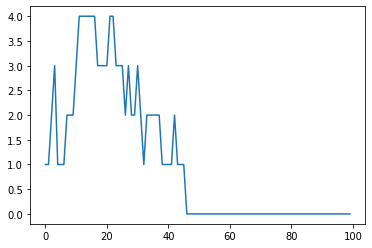

In [9]:
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))

plt.plot(list_timeSeries_num)
plt.show()

消滅の起こる確率を20% にすると、10ヶ月前後には利用者がいなくなる様子を確認できた。
<small>※ 実行する毎に結果は変化する</Small>

---

口コミの伝播（拡散）はと利用の中断（消滅）がｄのような確率で起こるからは
- 商品や Service
- Campaign などがあるかどうか

などによって影響を受ける。また、口コミの拡散と消滅が商品の普及にどう影響するかは更に重要になる。

そうした普及の様子を俯瞰するために**相図**を描く。

In [10]:
T_NUM = 100
NUM_PhaseDiagram = 20
phaseDiagram = np.zeros((NUM_PhaseDiagram, NUM_PhaseDiagram))
for i_p in range(NUM_PhaseDiagram):
    for i_d in range(NUM_PhaseDiagram):
        percent_percolation = 0.05 * i_p
        percent_disappearance = 0.05 * i_d
        list_active = np.zeros(NUM)
        list_active[0] = 1
        for t in range(T_NUM):
            list_active = simulate_population(NUM, list_active, percent_percolation, percent_disappearance, df_links)
        phaseDiagram[i_p][i_d] = sum(list_active)

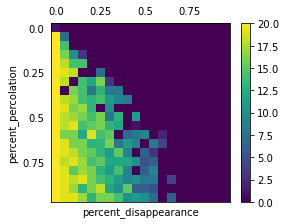

In [ ]:
plt.matshow(phaseDiagram)
plt.colorbar(shrink=0.8)
plt.xlabel('percent_disappearance')
plt.ylabel('percent_percolation')
plt.xticks(np.arange(0.0, 20.0, 5), np.arange(0.0, 1.0, 0.25))
plt.yticks(np.arange(0.0, 20.0, 5), np.arange(0.0, 1.0, 0.25))
plt.tick_params(bottom=False,
                left=False,
                right=False,
                top=False)
plt.show()

口コミの起こる確率と、消滅の起こる確率を少しずつ変化させながら、100ケ月後に何人の利用が続いているかを色で表示したもの。
- 消滅の確率がある程度小さければ、口コミの確率は小さくても20人全員が利用していることが見られる。
- 消滅の確率が20~30%を超えてしまうと、どんなに口コミの確率が大きくても、利用者は増えない。

---
Sports gym の会員全体の実 Data を用いた Simulation を行なう。


In [10]:
df_mem_links = pd.read_csv('sample_code/chapter_8/links_members.csv')
df_mem_info = pd.read_csv('sample_code/chapter_8/info_members.csv')

540人という規模だと Network を可視化しても、Node が密集してうまく状況を掴むことができない。
Link 数の分布を可視化してみることで Network の構造をある程度把握するため、分布表を表示する。

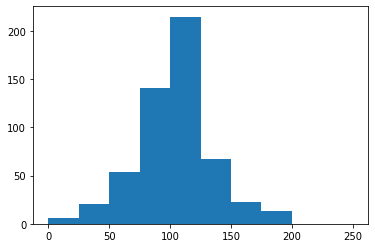

In [11]:
NUM = len(df_mem_links.index)
array_linkNum = np.zeros(NUM)
for i in range(NUM):
    array_linkNum[i] = sum(df_mem_links[f'Node{str(i)}'])

plt.hist(array_linkNum, bins=10, range=(0, 250))
plt.show()

Link 数が概ね100程度に集まって分布している正規分布に近い形であることがわかる。
どの Node もある程度の Link 数を持っている分布のため
- 急激に口コミが広がることもない
- Hub などに頼らなくても口コミが広がりやすい

といえる。

---
実 Data を使った Simulation を行なう。精度の良い Simulation を実施することができれば、将来予測に用いることができる。
今回の Model で重要な Parameters は

Parameters | 内容
--- | ---
percent_percolation | 口コミが伝播する確率
percent_disappearance | 口コミが消滅する確率

In [12]:
NUM = len(df_mem_info.index)
T_NUM = len(df_mem_info.columns) - 1

# 消滅の確率推定
count_active = 0
count_active_to_inactive = 0
for t in range(1, T_NUM):
    for i in range(NUM):
        if df_mem_info.iloc[i][t] == 1:
            count_active_to_inactive += 1
            if df_mem_info.iloc[i][t + 1] == 0:
                count_active += 1

estimated_percent_disappearance = count_active / count_active_to_inactive

In [13]:
# 拡散の確率推定
count_link = 0
count_link_to_active = 0
count_link_temp = 0
for t in range(T_NUM-1):
    df_link_t = df_mem_info[df_mem_info[str(t)] == 1]
    temp_flag_count = np.zeros(NUM)
    for i in range(len(df_link_t.index)):
        df_link_temp = df_mem_links[df_mem_links[f'Node{str(df_link_t.index[i])}'] == 1]
        for j in range(len(df_link_temp.index)):
            if df_mem_info.iloc[df_link_temp.index[j]][t] == 0:
                if temp_flag_count[df_link_temp.index[j]] == 0:
                    count_link += 1
                if df_mem_info.iloc[df_link_temp.index[j]][t+1] == 1:
                    if temp_flag_count[df_link_temp.index[j]] == 0:
                        temp_flag_count[df_link_temp.index[j]] = 1
                        count_link_to_active += 1


estimated_percent_percolation = count_link_to_active / count_link

In [14]:
print('口コミの消滅の確率')
estimated_percent_disappearance

口コミの消滅の確率


0.10147163541419416

In [15]:
print('口コミの伝播（拡散）の確率')
estimated_percent_percolation

口コミの伝播（拡散）の確率


0.025184661323275185

推定した Parameters で、どの程度正確な Simulation を行なうことができるのかを確認とっていく。

In [16]:
percent_percolation = 0.025184661323275185
percent_disappearance = 0.10147163541419416
T_NUM = 24
NUM = len(df_mem_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1
list_timeSeries = []
for t in range(T_NUM):
    list_active = simulate_population(NUM, list_active, percent_percolation, percent_disappearance, df_mem_links)
    list_timeSeries.append(list_active.copy())

In [17]:
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))

In [18]:
T_NUM = len(df_mem_info.columns) - 1
list_timeSeries_num_real = []
for t in range(0, T_NUM):
    list_timeSeries_num_real.append(len(df_mem_info[df_mem_info[str(t)] == 1].index))

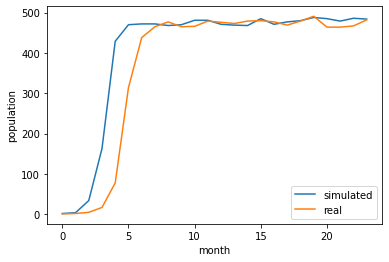

In [19]:
plt.plot(list_timeSeries_num, label='simulated')
plt.plot(list_timeSeries_num_real, label='real')
plt.xlabel('month')
plt.ylabel('population')
plt.legend(loc='lower right')
plt.show()

Simulation による利用者数は、実 Data によるものと近い挙動を示すことがわかる。
### 注意点
- ３～５月目のどこかで急激に利用者が増加するという傾向は再現できるが、乱数の影響でズレが生じる。（※予測精度の限界）
- 「数ヶ月ずれるが性質上は遅かれ早かれ立ち上がる」という定性的な予測に用いる。
- より予測精度を高めるためには、同じ Simulation を数回実行して平均値をとる。

In [20]:
percent_percolation = 0.025184661323275185
percent_disappearance = 0.10147163541419416
T_NUM = 36
NUM = len(df_mem_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1
list_timeSeries = []
for t in range(T_NUM):
    list_active = simulate_population(NUM, list_active, percent_percolation, percent_disappearance, df_mem_links)
    list_timeSeries.append(list_active.copy())

In [21]:
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))

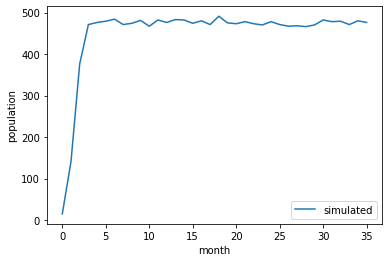

In [23]:
plt.plot(list_timeSeries_num, label='simulated')
plt.xlabel('month')
plt.ylabel('population')
plt.legend(loc='lower right')
plt.show()

24ケ月目までの傾向がそのまま続くことが確認できた。「急激に立ち下がりなどが起こることなく継続する」と解釈できる。